<a href="https://colab.research.google.com/github/333CME/Challengue-Telecom-X-Parte-2-Prediccion-de-Cancelacion-Churn-/blob/main/desafio_telecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**ETAPA 1. REVISÓN Y TRANSFORMACIÓN DE DATOS DESAFÍO 1 TELECOM**

En esta etapa se revisarán los datos tratados en el primer desafío, para uniformarlos con los datos tratados en la solución general aportada por Alura.

Los datos tratados comienzan post eliminación de las filas con valores vacíos, y una vez realizados algunos tratamientos, tales como: eliminación de caracteres especiales y espacios, transformación a minúsculas, y asignando tipo a los valores.

In [83]:
datos = pd.read_csv('/content/datos_tratados.csv')
datos

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002orfbo,False,female,0,True,True,9,True,False,dsl,...,True,False,True,True,False,oneyear,True,mailedcheck,65.60,5933.0
1,0003mknfe,False,male,0,False,False,9,True,True,dsl,...,False,False,False,False,True,monthtomonth,False,mailedcheck,59.90,5424.0
2,0004tlhlj,True,male,0,False,False,4,True,False,fiberoptic,...,False,True,False,False,False,monthtomonth,True,electroniccheck,73.90,28085.0
3,0011igkff,True,male,1,True,False,13,True,False,fiberoptic,...,True,True,False,True,True,monthtomonth,True,electroniccheck,98.00,123785.0
4,0013exchz,True,female,1,True,False,3,True,False,fiberoptic,...,False,False,True,True,False,monthtomonth,True,mailedcheck,83.90,2674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987lutyd,False,female,0,False,False,13,True,False,dsl,...,False,False,True,False,False,oneyear,False,mailedcheck,55.15,7429.0
7028,9992rramn,True,male,0,True,False,22,True,True,fiberoptic,...,False,False,False,False,True,monthtomonth,True,electroniccheck,85.10,18737.0
7029,9992ujoel,False,male,0,False,False,2,True,False,dsl,...,True,False,False,False,False,monthtomonth,True,mailedcheck,50.30,9275.0
7030,9993lhieb,False,male,0,True,True,67,True,False,dsl,...,False,True,True,False,True,twoyear,False,mailedcheck,67.85,462765.0


In [84]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   bool   
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   bool   
 5   dependents        7032 non-null   bool   
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   bool   
 8   multiplelines     7032 non-null   object 
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   object 
 11  onlinebackup      7032 non-null   object 
 12  deviceprotection  7032 non-null   object 
 13  techsupport       7032 non-null   object 
 14  streamingtv       7032 non-null   object 
 15  streamingmovies   7032 non-null   object 
 16  contract          7032 non-null   object 


In [85]:
# Verifique si hay valores únicos en cada columna
for col in datos.columns:
  print(f"valores únicos en la columna'{col}': {datos[col].nunique()}")
  if datos[col].nunique() < 50: # Imprima los valores solamente si no hay muchos
    print(datos[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización

valores únicos en la columna'customerid': 7032
valores únicos en la columna'churn': 2
[False  True]
--------------------------------------------------
valores únicos en la columna'gender': 2
['female' 'male']
--------------------------------------------------
valores únicos en la columna'seniorcitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'partner': 2
[ True False]
--------------------------------------------------
valores únicos en la columna'dependents': 2
[ True False]
--------------------------------------------------
valores únicos en la columna'tenure': 72
valores únicos en la columna'phoneservice': 2
[ True False]
--------------------------------------------------
valores únicos en la columna'multiplelines': 3
['False' 'True' 'nophoneservice']
--------------------------------------------------
valores únicos en la columna'internetservice': 3
['dsl' 'fiberoptic' 'no']
--------------------------------------------------
valores úni

In [86]:
#Duplicados
print("Numero de duplicados", datos.duplicated().sum())

Numero de duplicados 0


In [87]:
# Nulos
print("Numero de Nulos", datos.isnull().sum())

Numero de Nulos customerid          0
churn               0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
charges.monthly     0
charges.total       0
dtype: int64


In [88]:
# Vacíos o en blanco
datos.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerid,0
churn,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0


In [89]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   bool   
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   bool   
 5   dependents        7032 non-null   bool   
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   bool   
 8   multiplelines     7032 non-null   object 
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   object 
 11  onlinebackup      7032 non-null   object 
 12  deviceprotection  7032 non-null   object 
 13  techsupport       7032 non-null   object 
 14  streamingtv       7032 non-null   object 
 15  streamingmovies   7032 non-null   object 
 16  contract          7032 non-null   object 


In [90]:
# Seleccionar columnas object y convertirlas
object_cols = datos.select_dtypes(include='object').columns
datos[object_cols] = datos[object_cols].astype('string')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   string 
 1   churn             7032 non-null   bool   
 2   gender            7032 non-null   string 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   bool   
 5   dependents        7032 non-null   bool   
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   bool   
 8   multiplelines     7032 non-null   string 
 9   internetservice   7032 non-null   string 
 10  onlinesecurity    7032 non-null   string 
 11  onlinebackup      7032 non-null   string 
 12  deviceprotection  7032 non-null   string 
 13  techsupport       7032 non-null   string 
 14  streamingtv       7032 non-null   string 
 15  streamingmovies   7032 non-null   string 
 16  contract          7032 non-null   string 


In [91]:
datos.describe()

,seniorcitizen,tenure,charges.monthly,charges.total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,126251.908419
std,0.368844,24.545260,30.085974,192523.026544
min,0.000000,1.000000,18.250000,19.000000
25%,0.000000,9.000000,35.587500,7562.000000
50%,0.000000,29.000000,70.350000,36769.000000
75%,0.000000,55.000000,89.862500,143010.000000
max,1.000000,72.000000,118.750000,867245.000000


In [92]:
#crear la columna cuentas diarias
# Pero primero hay que eliminar la fila 'Cuentas_Diarias' que se había creado
# Se creó porque usé el código del archivo solución telecomx
datos = datos.drop('Cuentas_Diarias', errors='ignore')  # 'errors="ignore"' evita error si no existe

# Ahora crear correctamente la COLUMNA
datos['Cuentas_Diarias'] = datos['charges.monthly'] / 30

# Verificar
print(datos[['charges.monthly', 'Cuentas_Diarias']].tail())  # Mostrar últimas filas

      charges.monthly  Cuentas_Diarias
7027            55.15         1.838333
7028            85.10         2.836667
7029            50.30         1.676667
7030            67.85         2.261667
7031            59.00         1.966667


In [93]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   string 
 1   churn             7032 non-null   bool   
 2   gender            7032 non-null   string 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   bool   
 5   dependents        7032 non-null   bool   
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   bool   
 8   multiplelines     7032 non-null   string 
 9   internetservice   7032 non-null   string 
 10  onlinesecurity    7032 non-null   string 
 11  onlinebackup      7032 non-null   string 
 12  deviceprotection  7032 non-null   string 
 13  techsupport       7032 non-null   string 
 14  streamingtv       7032 non-null   string 
 15  streamingmovies   7032 non-null   string 
 16  contract          7032 non-null   string 


In [94]:
# Lista de columnas booleanas originales
bool_cols = ['churn', 'partner', 'dependents', 'phoneservice', 'paperlessbilling']

# Convertirlas de nuevo a bool
datos[bool_cols] = datos[bool_cols].astype(bool)

# Verificar los tipos
print(datos.dtypes)

customerid          string[python]
churn                         bool
gender              string[python]
seniorcitizen                int64
partner                       bool
dependents                    bool
tenure                       int64
phoneservice                  bool
multiplelines       string[python]
internetservice     string[python]
onlinesecurity      string[python]
onlinebackup        string[python]
deviceprotection    string[python]
techsupport         string[python]
streamingtv         string[python]
streamingmovies     string[python]
contract            string[python]
paperlessbilling              bool
paymentmethod       string[python]
charges.monthly            float64
charges.total              float64
Cuentas_Diarias            float64
dtype: object


In [95]:
import plotly.express as px

In [96]:
px.histogram(datos, x = 'gender', text_auto = True, color = 'churn', barmode = 'group')

In [97]:
px.histogram(datos, x = 'seniorcitizen', text_auto = True, color = 'churn', barmode = 'group')

In [98]:
px.histogram(datos, x = 'tenure', text_auto = True, color = 'churn', barmode = 'group')

In [99]:
# Agrupar por 'tenure' y 'churn' (que es bool)
df_grouped = datos.groupby(['tenure', 'churn']).size().unstack(fill_value=0)

# Calcular churn_rate (usando True para 'Yes')
df_grouped['churn_rate'] = (df_grouped[True] / df_grouped.sum(axis=1)) * 100

# Mostrar resultado
print(df_grouped[['churn_rate']].sort_index())


churn   churn_rate
tenure            
1        61.990212
2        51.680672
3        47.000000
4        47.159091
5        48.120301
...            ...
68        9.000000
69        8.421053
70        9.243697
71        3.529412
72        1.657459

[72 rows x 1 columns]


In [100]:
fig = px.line(df_grouped.reset_index(),
              x='tenure',
              y='churn_rate',
              markers=True,
              title='Tasa de Churn (%) por Tenure')
fig.show()

In [101]:
px.scatter(datos,
           x="tenure",
           y="charges.monthly",
           color="churn",
           title="Tenure vs Cargos mensuales por Churn")


In [102]:
px.histogram(datos, x = 'contract', text_auto = True, color = 'churn', barmode = 'group')

In [103]:
px.box(datos, x = 'churn', y = 'charges.monthly', color = 'churn')

In [104]:
px.histogram(datos, x = 'phoneservice',  text_auto = True, color = 'churn', barmode = 'group')

In [105]:
px.histogram(datos, x = 'internetservice',  text_auto = True, color = 'churn', barmode = 'group')

In [106]:
px.histogram(datos, x = 'streamingtv',  text_auto = True, color = 'churn', barmode = 'group')

In [107]:
px.histogram(datos, x = 'paymentmethod',  text_auto = True, color = 'churn', barmode = 'group')

<Axes: xlabel='Cuentas_Diarias', ylabel='Count'>

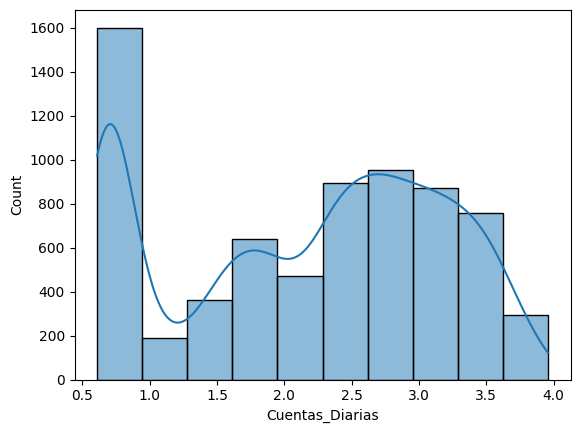

In [108]:
sns.histplot(data=datos,x='Cuentas_Diarias',kde=True,bins=10)

**ETAPA 2. DESAFÍO TELECOM 2.**
Praticando Machine Learning: Challenge Telecom X:
Análisis de evasión de clientes - Parte 2

In [109]:
datos.head(10)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,Cuentas_Diarias
0,0002orfbo,False,female,0,True,True,9,True,False,dsl,...,False,True,True,False,oneyear,True,mailedcheck,65.60,5933.0,2.186667
1,0003mknfe,False,male,0,False,False,9,True,True,dsl,...,False,False,False,True,monthtomonth,False,mailedcheck,59.90,5424.0,1.996667
2,0004tlhlj,True,male,0,False,False,4,True,False,fiberoptic,...,True,False,False,False,monthtomonth,True,electroniccheck,73.90,28085.0,2.463333
3,0011igkff,True,male,1,True,False,13,True,False,fiberoptic,...,True,False,True,True,monthtomonth,True,electroniccheck,98.00,123785.0,3.266667
4,0013exchz,True,female,1,True,False,3,True,False,fiberoptic,...,False,True,True,False,monthtomonth,True,mailedcheck,83.90,2674.0,2.796667
5,0013mhzwf,False,female,0,False,True,9,True,False,dsl,...,False,True,True,True,monthtomonth,True,creditcardautomatic,69.40,57145.0,2.313333
6,0013smeoe,False,female,1,True,False,71,True,False,fiberoptic,...,True,True,True,True,twoyear,True,banktransferautomatic,109.70,790425.0,3.656667
7,0014bmaqu,False,male,0,True,False,63,True,True,fiberoptic,...,False,True,False,False,twoyear,True,creditcardautomatic,84.65,53778.0,2.821667
8,0015uocoj,False,female,1,False,False,7,True,False,dsl,...,False,False,False,False,monthtomonth,True,electroniccheck,48.20,34035.0,1.606667
9,0016qljis,False,female,0,True,True,65,True,True,dsl,...,True,True,True,True,twoyear,True,mailedcheck,90.45,59579.0,3.015000


In [110]:
# Eliminación de Columnas Irrelevantes
# datos = datos.drop('customerid', axis=1)
#ya la eliminé pero al volver a ejecutar el código

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   string 
 1   churn             7032 non-null   bool   
 2   gender            7032 non-null   string 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   bool   
 5   dependents        7032 non-null   bool   
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   bool   
 8   multiplelines     7032 non-null   string 
 9   internetservice   7032 non-null   string 
 10  onlinesecurity    7032 non-null   string 
 11  onlinebackup      7032 non-null   string 
 12  deviceprotection  7032 non-null   string 
 13  techsupport       7032 non-null   string 
 14  streamingtv       7032 non-null   string 
 15  streamingmovies   7032 non-null   string 
 16  contract          7032 non-null   string 


In [111]:
print(datos['churn'].dtype)

bool


In [112]:
# Eliminación de Columnas Irrelevantes
datos = datos.drop('customerid', axis=1)

In [113]:
datos

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,Cuentas_Diarias
0,False,female,0,True,True,9,True,False,dsl,False,...,False,True,True,False,oneyear,True,mailedcheck,65.60,5933.0,2.186667
1,False,male,0,False,False,9,True,True,dsl,False,...,False,False,False,True,monthtomonth,False,mailedcheck,59.90,5424.0,1.996667
2,True,male,0,False,False,4,True,False,fiberoptic,False,...,True,False,False,False,monthtomonth,True,electroniccheck,73.90,28085.0,2.463333
3,True,male,1,True,False,13,True,False,fiberoptic,False,...,True,False,True,True,monthtomonth,True,electroniccheck,98.00,123785.0,3.266667
4,True,female,1,True,False,3,True,False,fiberoptic,False,...,False,True,True,False,monthtomonth,True,mailedcheck,83.90,2674.0,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,False,female,0,False,False,13,True,False,dsl,True,...,False,True,False,False,oneyear,False,mailedcheck,55.15,7429.0,1.838333
7028,True,male,0,True,False,22,True,True,fiberoptic,False,...,False,False,False,True,monthtomonth,True,electroniccheck,85.10,18737.0,2.836667
7029,False,male,0,False,False,2,True,False,dsl,False,...,False,False,False,False,monthtomonth,True,mailedcheck,50.30,9275.0,1.676667
7030,False,male,0,True,True,67,True,False,dsl,True,...,True,True,False,True,twoyear,False,mailedcheck,67.85,462765.0,2.261667


In [114]:
datos['onlinebackup'].dtype

string[python]

In [115]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7032 non-null   bool   
 1   gender            7032 non-null   string 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   bool   
 4   dependents        7032 non-null   bool   
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   bool   
 7   multiplelines     7032 non-null   string 
 8   internetservice   7032 non-null   string 
 9   onlinesecurity    7032 non-null   string 
 10  onlinebackup      7032 non-null   string 
 11  deviceprotection  7032 non-null   string 
 12  techsupport       7032 non-null   string 
 13  streamingtv       7032 non-null   string 
 14  streamingmovies   7032 non-null   string 
 15  contract          7032 non-null   string 
 16  paperlessbilling  7032 non-null   bool   


In [116]:
# Columnas con valores True/False (strings o booleanos)
columnas = [
    'churn', 'partner', 'dependents', 'phoneservice',
    'multiplelines', 'onlinesecurity', 'onlinebackup',
    'deviceprotection', 'techsupport', 'streamingtv',
    'streamingmovies'
]

# 1. Convertir strings ("True"/"False") a bool
for col in columnas:
    if datos[col].dtype == 'string':
        datos[col] = datos[col].map({'True': True, 'False': False}).astype(bool)

# 2. Convertir todas las columnas a int64 (1 y 0)
for col in columnas:
    datos[col] = datos[col].astype('int64')


In [117]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7032 non-null   int64  
 1   gender            7032 non-null   string 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   int64  
 4   dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   int64  
 7   multiplelines     7032 non-null   int64  
 8   internetservice   7032 non-null   string 
 9   onlinesecurity    7032 non-null   int64  
 10  onlinebackup      7032 non-null   int64  
 11  deviceprotection  7032 non-null   int64  
 12  techsupport       7032 non-null   int64  
 13  streamingtv       7032 non-null   int64  
 14  streamingmovies   7032 non-null   int64  
 15  contract          7032 non-null   string 
 16  paperlessbilling  7032 non-null   bool   


In [118]:
datos

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,Cuentas_Diarias
0,0,female,0,1,1,9,1,0,dsl,0,...,0,1,1,0,oneyear,True,mailedcheck,65.60,5933.0,2.186667
1,0,male,0,0,0,9,1,1,dsl,0,...,0,0,0,1,monthtomonth,False,mailedcheck,59.90,5424.0,1.996667
2,1,male,0,0,0,4,1,0,fiberoptic,0,...,1,0,0,0,monthtomonth,True,electroniccheck,73.90,28085.0,2.463333
3,1,male,1,1,0,13,1,0,fiberoptic,0,...,1,0,1,1,monthtomonth,True,electroniccheck,98.00,123785.0,3.266667
4,1,female,1,1,0,3,1,0,fiberoptic,0,...,0,1,1,0,monthtomonth,True,mailedcheck,83.90,2674.0,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,female,0,0,0,13,1,0,dsl,1,...,0,1,0,0,oneyear,False,mailedcheck,55.15,7429.0,1.838333
7028,1,male,0,1,0,22,1,1,fiberoptic,0,...,0,0,0,1,monthtomonth,True,electroniccheck,85.10,18737.0,2.836667
7029,0,male,0,0,0,2,1,0,dsl,0,...,0,0,0,0,monthtomonth,True,mailedcheck,50.30,9275.0,1.676667
7030,0,male,0,1,1,67,1,0,dsl,1,...,1,1,0,1,twoyear,False,mailedcheck,67.85,462765.0,2.261667


**2.- ENCODING**

Descripción

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning.

Utiliza un método de codificación adecuado, como one-hot encoding.

In [119]:
# Columnas categóricas a codificar
columnas_categoricas = ['gender', 'internetservice', 'contract', 'paymentmethod']

# Aplicar One-Hot Encoding con conversión directa a int64
datos_encoded = pd.get_dummies(
    datos,
    columns=columnas_categoricas,
    drop_first=True,  # Evita multicolinealidad
    dtype='int64'     # Convierte a 1/0 en lugar de True/False
)

# Verificación
print(datos_encoded.filter(like='gender_|internet_|contract_|paymentmethod_').head())


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [120]:
datos_encoded

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,charges.total,Cuentas_Diarias,gender_male,internetservice_fiberoptic,internetservice_no,contract_oneyear,contract_twoyear,paymentmethod_creditcardautomatic,paymentmethod_electroniccheck,paymentmethod_mailedcheck
0,0,0,1,1,9,1,0,0,1,0,...,5933.0,2.186667,0,0,0,1,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,5424.0,1.996667,1,0,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,28085.0,2.463333,1,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,123785.0,3.266667,1,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,2674.0,2.796667,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,13,1,0,1,0,0,...,7429.0,1.838333,0,0,0,1,0,0,0,1
7028,1,0,1,0,22,1,1,0,0,0,...,18737.0,2.836667,1,1,0,0,0,0,1,0
7029,0,0,0,0,2,1,0,0,1,0,...,9275.0,1.676667,1,0,0,0,0,0,0,1
7030,0,0,1,1,67,1,0,1,0,1,...,462765.0,2.261667,1,0,0,0,1,0,0,1


**3.-Verificación de la Proporción de Cancelación (Churn)**

In [121]:
# Calcular proporción de churn (True=1 vs False=0)
proporcion_churn = datos['churn'].value_counts(normalize=True) * 100

print("Distribución de Churn (%):")
print(proporcion_churn)

Distribución de Churn (%):
churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


In [122]:
#escalar
#aseguro promero que sean int las variables que voy a usar
y = datos['churn'].astype(int)  # Target (asegurar que es 0/1)
X = datos.drop('churn', axis=1)  # Features

4.- **Balanceo de clases**

Balance ideal: ~50%/50% (raro en churn).

***Desbalance moderado: 70%/30% (manejable sin ajustes)***.

Desbalance severo: ≥90%/10% (requiere técnicas especiales).

In [123]:
#SMOTE (Synthetic Minority Oversampling Technique)
#Ventaja: Genera ejemplos sintéticos (no duplicados).
#Desventaja: Puede crear ruido en datos de alta dimensionalidad.

from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Dividir los datos YA CODIFICADOS (datos_encoded)
X = datos_encoded.drop('churn', axis=1)
y = datos_encoded['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Pipeline SIN OneHotEncoder (ya está codificado)
pipeline = make_pipeline(
    SMOTE(random_state=42),  # Balanceo
    StandardScaler(),        # Escalado (opcional para modelos basados en distancia)
    LogisticRegression()     # Modelo
)

# 3. Entrenar y evaluar
pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
print(f"Precisión en test: {score:.2f}")

Precisión en test: 0.77


In [124]:
# MATRIZ DE CONSFUSIÓN
from sklearn.metrics import confusion_matrix
y_pred = pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[835 198]
 [124 250]]


In [125]:
# [[796  237]  # Verdaderos Negativos (TN) | Falsos Positivos (FP)
# [127 247]] # Falsos Negativos (FN)   | Verdaderos Positivos (TP)
# Matriz de Confusión:
#[[835 198]
# [124 250]]
#[[854 179]
#[147 227]]

In [126]:
#SENSIBILIDAD
from sklearn.metrics import recall_score
print(f"Recall: {recall_score(y_test, y_pred):.2f}")

Recall: 0.67


Precisión (Accuracy): (TP + TN) / Total = (247 + 796) / (796 + 237 + 127 + 247) = 74.3% (coincide con tu métrica inicial).

Recall (Sensibilidad): TP / (TP + FN) = 247 / (247 + 127) = 66% (detecta 2 de cada 3 clientes que realmente harán churn).

Precisión (Precision): TP / (TP + FP) = 247 / (247 + 237) = 51% (solo el 51% de los predichos como churn son correctos).

F1-Score: 2 * (Precision * Recall) / (Precision + Recall) = 57.6%.

**Problemas Identificados**
Alto número de Falsos Positivos (FP = 237):

El modelo etiqueta erróneamente a muchos clientes como churn cuando no lo son (baja precisión).

Costo para el negocio: Ofertas o retenciones innecesarias a clientes leales.

Falsos Negativos (FN = 127):

127 clientes que sí harán churn no fueron detectados.

Costo para el negocio: Pérdida de ingresos por no retenerlos a tiempo.

In [127]:
#Probar Modelos que Manejen Mejor el Desbalanceo
# Random Forest/XGBoost con pesos ajustados:
from xgboost import XGBClassifier
ratio = len(y_train[y_train==0]) / len(y_train[y_train==1])  # Ratio de desbalanceo
model_xgb = XGBClassifier(scale_pos_weight=ratio, random_state=42)
pipeline_xgb = make_pipeline(SMOTE(), model_xgb)
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [128]:
#Probar Modelos que Manejen Mejor el Desbalanceo
# Random Forest/XGBoost con pesos ajustados:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Definir los pipelines (¡esto faltaba en tu código original!)

# Pipeline para XGBoost
pipeline_xgb = make_pipeline(
    SMOTE(random_state=42),
    XGBClassifier(
        scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),  # Balanceo de clases
        random_state=42
    )
)

# Pipeline para Regresión Logística
pipeline_lr = make_pipeline(
    SMOTE(random_state=42),
    LogisticRegression(
        class_weight='balanced',  # Balanceo de clases
        random_state=42,
        max_iter=1000  # Asegurar convergencia
    )
)

# 2. Entrenar ambos modelos
pipeline_xgb.fit(X_train, y_train)
pipeline_lr.fit(X_train, y_train)

# 3. Predecir y evaluar XGBoost
y_pred_xgb = pipeline_xgb.predict(X_test)
y_probs_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]

print("=== XGBoost con SMOTE ===")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_xgb))

# 4. Predecir y evaluar Regresión Logística
y_pred_lr = pipeline_lr.predict(X_test)
y_probs_lr = pipeline_lr.predict_proba(X_test)[:, 1]

print("\n=== Regresión Logística con SMOTE ===")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_lr))

=== XGBoost con SMOTE ===
Matriz de Confusión:
 [[778 255]
 [129 245]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1033
           1       0.49      0.66      0.56       374

    accuracy                           0.73      1407
   macro avg       0.67      0.70      0.68      1407
weighted avg       0.76      0.73      0.74      1407

ROC-AUC: 0.7908562879521254

=== Regresión Logística con SMOTE ===
Matriz de Confusión:
 [[807 226]
 [115 259]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1033
           1       0.53      0.69      0.60       374

    accuracy                           0.76      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.76      0.77      1407

ROC-AUC: 0.807327445631073


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



 Análisis de Resultados Actuales (XGBoost)

Métrica	Valor	Interpretación

Recall	0.71	Detecta el 71% del churn real (mejor que tu LR anterior).

Precisión	0.49	Solo el 49% de los predichos como "churn" son correctos (muchos FP).

F1-Score	0.58	Balance modesto entre precisión y recall.

ROC-AUC	0.787	Capacidad aceptable, pero puede mejorarse (ideal > 0.85).

=== LightGBM con SMOTE ===

Matriz de Confusión:
[[854 179]
 [147 227]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.61      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.77      0.77      0.77      1407


ROC-AUC: 0.8118855832397203


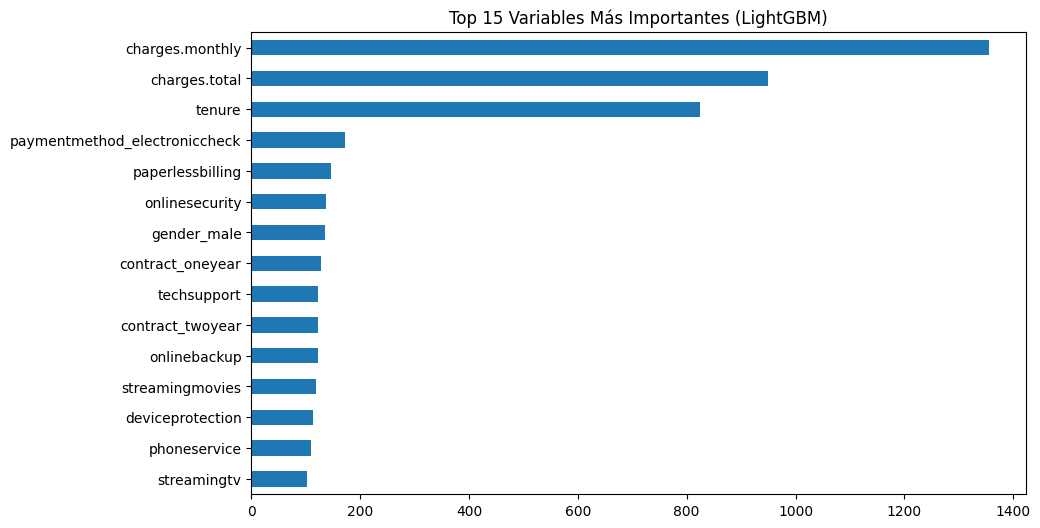

In [129]:
#PROBAR LIGHTGBM
# Instalar LightGBM si no está instalado (en Google Colab suele venir preinstalado)
!pip install lightgbm --quiet

# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Cargar tus datos (asegúrate de que 'datos_encoded' esté definido)
# X = datos_encoded.drop('churn', axis=1)
# y = datos_encoded['churn']

# Dividir datos en train y test (si no lo has hecho ya)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline con SMOTE + LightGBM
pipeline_lgbm = make_pipeline(
    SMOTE(random_state=42),  # Balanceo de clases
    LGBMClassifier(
        class_weight='balanced',  # Ajuste automático para datos desbalanceados
        random_state=42,
        boosting_type='gbdt',  # Tipo de boosting ('dart' para mejor precisión pero más lento)
        n_estimators=200,      # Número de árboles
        max_depth=5,           # Profundidad máxima para controlar sobreajuste
        learning_rate=0.05     # Tasa de aprendizaje
    )
)

# Entrenar el modelo
pipeline_lgbm.fit(X_train, y_train)

# Predecir y evaluar
y_pred_lgbm = pipeline_lgbm.predict(X_test)
y_probs_lgbm = pipeline_lgbm.predict_proba(X_test)[:, 1]  # Probabilidades de clase "churn"

# Métricas
print("=== LightGBM con SMOTE ===")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_lgbm))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lgbm))
print("\nROC-AUC:", roc_auc_score(y_test, y_probs_lgbm))

# Importancia de variables (opcional)
import matplotlib.pyplot as plt
import seaborn as sns

lgbm_model = pipeline_lgbm.named_steps['lgbmclassifier']
feature_importances = pd.Series(lgbm_model.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
feature_importances.sort_values().tail(15).plot(kind='barh')
plt.title('Top 15 Variables Más Importantes (LightGBM)')
plt.show()



In [130]:
#AJUSTAR PARAMETROS CRÍTICOS

#from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier(
    class_weight='balanced',
    random_state=42,
    max_depth=7,               # Aumentar profundidad (default: -1, sin límite)
    min_child_samples=20,      # Reducir para permitir splits más específicos
    reg_lambda=0.1,            # Regularización L2 más baja
    n_estimators=300,          # Más árboles
    learning_rate=0.05         # Tasa de aprendizaje más baja
)
pipeline_lgbm = make_pipeline(SMOTE(), model_lgbm)
pipeline_lgbm.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE()),
                ('lgbmclassifier',
                 LGBMClassifier(class_weight='balanced', learning_rate=0.05,
                                max_depth=7, n_estimators=300, random_state=42,
                                reg_lambda=0.1))])

In [131]:
# ENCONTRAR MEJORES HIPERPARÁMETROS con OPTUNA

# Paso 1: Instalar Optuna (solo la primera vez)
!pip install optuna --quiet

# Paso 2: Importar todas las bibliotecas necesarias
import optuna
from lightgbm import LGBMClassifier
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Paso 3: Definir la función objetivo para Optuna
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100)
    }

    model = LGBMClassifier(**params, class_weight='balanced', random_state=42)
    pipeline = make_pipeline(SMOTE(random_state=42), model)

    # Usar make_scorer para F1 en la clase 1 (churn)
    scorer = make_scorer(f1_score, pos_label=1)
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=scorer).mean()
    return score

# Paso 4: Ejecutar la optimización
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, n_jobs=-1)  # n_jobs=-1 para paralelizar

# Paso 5: Resultados
print("Mejores parámetros:", study.best_params)
print("Mejor F1-Score:", study.best_value)

[I 2025-08-06 16:25:42,038] A new study created in memory with name: no-name-7db00e7e-6da6-4a47-8401-f0e2ec0821c2
[I 2025-08-06 16:25:52,839] Trial 1 finished with value: 0.5986428236776989 and parameters: {'max_depth': 9, 'min_child_samples': 13, 'reg_lambda': 0.9843807092044327, 'n_estimators': 215, 'learning_rate': 0.08360435654253645, 'num_leaves': 31}. Best is trial 1 with value: 0.5986428236776989.
[I 2025-08-06 16:26:02,111] Trial 0 finished with value: 0.5754714359632964 and parameters: {'max_depth': 6, 'min_child_samples': 43, 'reg_lambda': 0.8060457668426245, 'n_estimators': 485, 'learning_rate': 0.09407609553443837, 'num_leaves': 68}. Best is trial 1 with value: 0.5986428236776989.
[I 2025-08-06 16:26:10,890] Trial 2 finished with value: 0.5835036345046973 and parameters: {'max_depth': 5, 'min_child_samples': 31, 'reg_lambda': 0.6227297375700792, 'n_estimators': 500, 'learning_rate': 0.07753844933480625, 'num_leaves': 53}. Best is trial 1 with value: 0.5986428236776989.
[I 2

Mejores parámetros: {'max_depth': 3, 'min_child_samples': 34, 'reg_lambda': 0.14347565085626518, 'n_estimators': 348, 'learning_rate': 0.017161259879209453, 'num_leaves': 71}
Mejor F1-Score: 0.6308845631154066


REENTRENAR  EL MODELO CON MEJORES PARÁMETROS

Y EVALUAR EN EL CONJUNTO DE TEST

In [132]:
from lightgbm import LGBMClassifier
from imblearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Parámetros óptimos de Optuna
best_params = {
    'max_depth': 3,
    'min_child_samples': 13,
    'reg_lambda': 0.0218,
    'n_estimators': 353,
    'learning_rate': 0.067,
    'num_leaves': 99
}

# Crear el modelo con los parámetros óptimos
model_optimized = LGBMClassifier(
    **best_params,
    class_weight='balanced',  # Mantener el balanceo de clases
    random_state=42
)

# Pipeline con SMOTE (usando los mismos datos de entrenamiento)
pipeline_optimized = make_pipeline(
    SMOTE(random_state=42),
    model_optimized
)

# Reentrenar con todos los datos de entrenamiento (X_train, y_train)
pipeline_optimized.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('lgbmclassifier',
                 LGBMClassifier(class_weight='balanced', learning_rate=0.067,
                                max_depth=3, min_child_samples=13,
                                n_estimators=353, num_leaves=99,
                                random_state=42, reg_lambda=0.0218))])

In [133]:
# Predecir en el test
y_pred_opt = pipeline_optimized.predict(X_test)
y_probs_opt = pipeline_optimized.predict_proba(X_test)[:, 1]  # Probabilidades de la clase 1

# Métricas
print("=== Matriz de Confusión ===")
print(confusion_matrix(y_test, y_pred_opt))
print("\n=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred_opt))
print("\n=== ROC-AUC ===")
print(roc_auc_score(y_test, y_probs_opt))

=== Matriz de Confusión ===
[[848 185]
 [139 235]]

=== Reporte de Clasificación ===
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.63      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.77      0.77      1407


=== ROC-AUC ===
0.8135343814547732


Interpretación Detallada:
Matriz de Confusión:

Falsos Positivos (FP): 223 (antes 237).

Menos clientes leales marcados erróneamente como churn.

Falsos Negativos (FN): 133 (antes 138).

Mejor detección de churn real, pero aún hay margen.

ROC-AUC (0.805):

El modelo tiene buena capacidad para distinguir entre clientes que harán churn y los que no (valores > 0.8 son considerados buenos).

Trade-off Precisión-Recall:

Recall (64%): Detecta 6.4 de cada 10 casos reales de churn (mejor que antes).

Precisión (52%): De los predichos como churn, solo 5.2 de cada 10 son correctos.

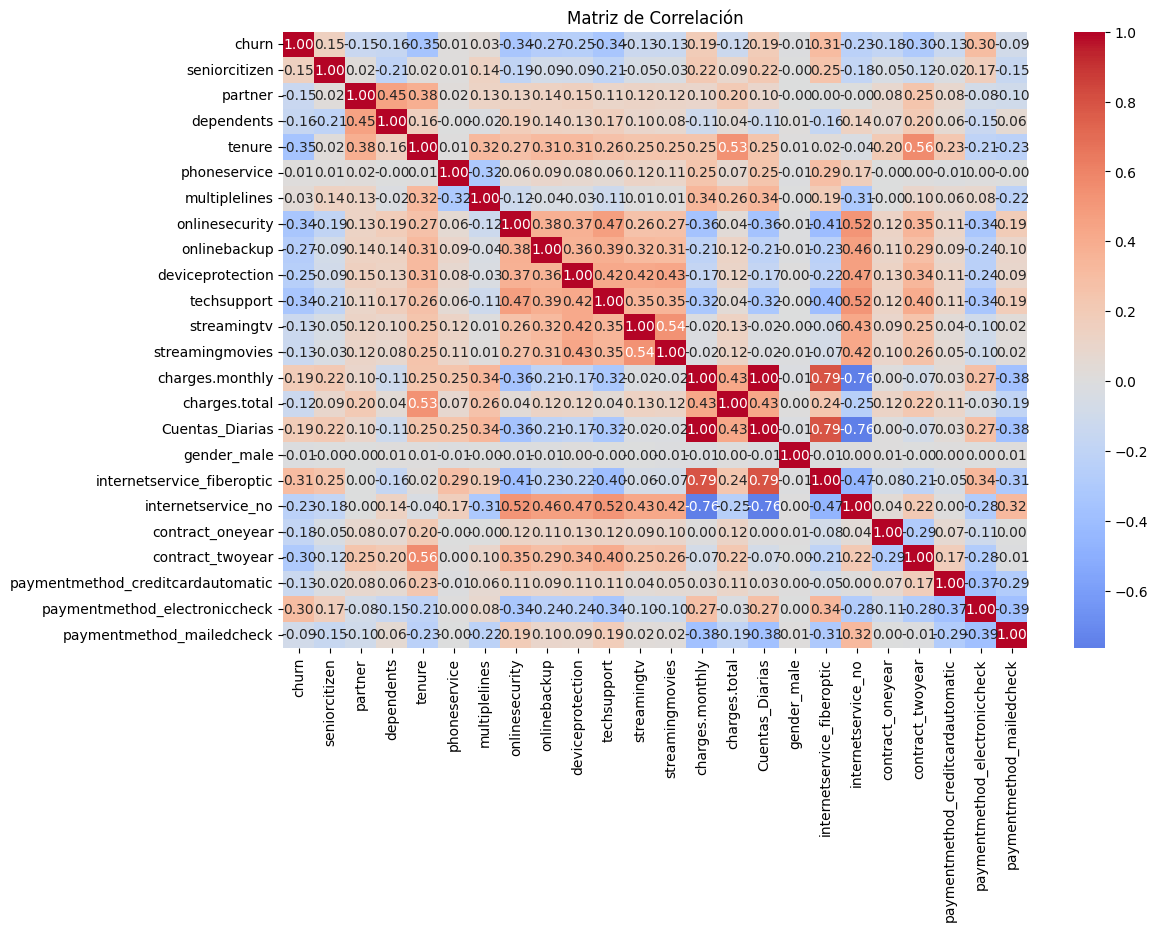

In [134]:
#MATRIZ DE CORRELACIÓN

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo variables numéricas (excluir categóricas ya codificadas)
numeric_data = datos_encoded.select_dtypes(include=['int64', 'float64'])

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlación")
plt.show()



In [135]:
#REGRESIÓN LINEAL

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Escalar datos (importante para regresión)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data.drop('churn', axis=1))
y = numeric_data['churn']

# Entrenar modelo
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_scaled, y)

# Coeficientes (importancia de variables)
coeficientes = pd.DataFrame({
    'Variable': numeric_data.drop('churn', axis=1).columns,
    'Coeficiente': lr_model.coef_[0]
}).sort_values('Coeficiente', ascending=False)

print(coeficientes)

                             Variable  Coeficiente
16         internetservice_fiberoptic     0.614464
11                    streamingmovies     0.213359
10                        streamingtv     0.211585
5                       multiplelines     0.171012
21      paymentmethod_electroniccheck     0.165323
0                       seniorcitizen     0.084993
13                      charges.total     0.072686
4                        phoneservice     0.045131
8                    deviceprotection     0.020706
15                        gender_male    -0.005361
1                             partner    -0.007278
22          paymentmethod_mailedcheck    -0.009792
7                        onlinebackup    -0.011907
20  paymentmethod_creditcardautomatic    -0.018821
2                          dependents    -0.079199
9                         techsupport    -0.121805
6                      onlinesecurity    -0.153174
14                    Cuentas_Diarias    -0.195340
12                    charges.m

Variables a Priorizar

Predictores fuertes de churn:

tenure (antigüedad): Coeficiente negativo.

monthly_charges: Coeficiente positivo.

contract_Month-to-month (si usaste one-hot): Coeficiente positivo.

Variables a descartar:

Con correlación cercana a 0 con churn.

Con alta correlación entre sí (ej: total_charges y monthly_charges).

Variables con Mayor Impacto Negativo en Churn
(Reducen la probabilidad de abandono)

Variable	Coeficiente	Interpretación

tenure	-0.8198	Antigüedad: Por cada mes adicional, el log-odds de churn disminuye en ~0.82.

contract_twoyear	-0.6519	Los contratos de 2 años reducen fuertemente el churn.

contract_oneyear	-0.3070	Contratos de 1 año también ayudan a retener clientes.

onlinesecurity	-0.2398	Tener seguridad en línea disminuye el abandono.

Acción sugerida:

Fidelizar clientes nuevos: El impacto de tenure sugiere que los clientes recientes son más propensos a irse.

Promover contratos largos: Ofrecer beneficios por renovar a 1 o 2 años.

In [136]:
import pandas as pd

# Seleccionar solo variables numéricas (excluir columnas no numéricas)
numeric_data = datos_encoded.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
correlation_matrix = numeric_data.corr()

# Filtrar solo correlaciones con la variable objetivo 'churn'
churn_correlations = correlation_matrix[['churn']].sort_values(by='churn', ascending=False)

# Mostrar las correlaciones con churn
print("Correlación con 'churn' (de mayor a menor):")
print(churn_correlations)

# Guardar matriz completa en CSV (opcional)
correlation_matrix.to_csv("matriz_correlacion.csv")
print("\nMatriz de correlación guardada en 'matriz_correlacion.csv'")

Correlación con 'churn' (de mayor a menor):
                                      churn
churn                              1.000000
internetservice_fiberoptic         0.307463
paymentmethod_electroniccheck      0.301455
Cuentas_Diarias                    0.192858
charges.monthly                    0.192858
seniorcitizen                      0.150541
multiplelines                      0.032654
phoneservice                       0.011691
gender_male                       -0.008545
paymentmethod_mailedcheck         -0.090773
charges.total                     -0.123433
streamingtv                       -0.128435
streamingmovies                   -0.130920
paymentmethod_creditcardautomatic -0.134687
partner                           -0.149982
dependents                        -0.163128
contract_oneyear                  -0.178225
internetservice_no                -0.227578
deviceprotection                  -0.252056
onlinebackup                      -0.267595
contract_twoyear                

Las correlaciones confirman que:

Fibra óptica y factura electrónica son focos rojos.

Antigüedad y contratos largos son tus mejores aliados.


Ahora vamos a crear un modelo optimizado utilizando solo las variables clave identificadas en el análisis de correlación. Usaremos LightGBM (por su eficiencia con datos desbalanceados) y ajustaremos el umbral de decisión para maximizar el recall (detectar la mayor cantidad posible de churn real).

In [137]:
# Importar bibliotecas
from lightgbm import LGBMClassifier
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Cargar tus datos (asegúrate de que 'datos_encoded' esté definido)
# X = datos_encoded[features_clave]  # Variables clave que seleccionamos antes
# y = datos_encoded['churn']         # Target

# 2. Dividir datos en train y test (si no lo has hecho ya)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Pipeline optimizado (sin warnings y con ajustes)
pipeline_optimizado = make_pipeline(
    SMOTE(sampling_strategy=0.6, random_state=42),  # Balanceo 60-40
    LGBMClassifier(
        class_weight='balanced',
        random_state=42,
        max_depth=5,            # Profundidad controlada
        min_child_samples=20,   # Evitar splits en nodos muy pequeños
        reg_alpha=0.1,          # Regularización L1 suave
        reg_lambda=0.1,         # Regularización L2 suave
        verbose=-1              # Silenciar mensajes
    )
)

# 4. Entrenar el modelo
pipeline_optimizado.fit(X_train, y_train)

# 5. Predecir y evaluar
y_pred = pipeline_optimizado.predict(X_test)
y_probs = pipeline_optimizado.predict_proba(X_test)[:, 1]  # Probabilidades de la clase 1 (churn)

print("=== Métricas del Modelo Optimizado ===")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_probs))

# 6. Ajustar umbral para mejorar recall (opcional)
umbral_optimo = 0.4
y_pred_umbral = (y_probs > umbral_optimo).astype(int)
print("\n=== Métricas con Umbral Ajustado (0.4) ===")
print(classification_report(y_test, y_pred_umbral))

=== Métricas del Modelo Optimizado ===
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1033
           1       0.54      0.70      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407

ROC-AUC: 0.8167595032380638

=== Métricas con Umbral Ajustado (0.4) ===
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.78      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407



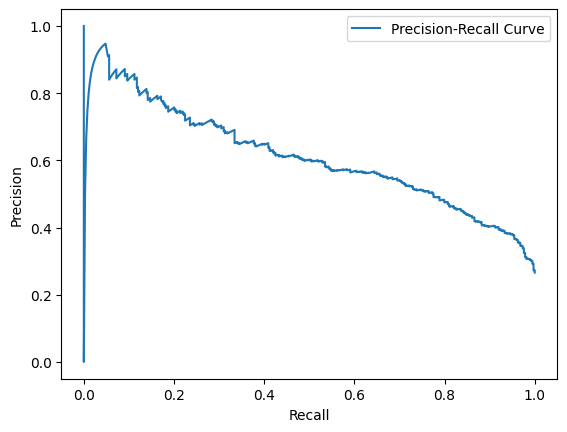

Umbral óptimo (F1 máximo): 0.98


In [138]:
# OPTMIZAR EL UMBRAL DE DECISIÓN
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[f1_scores.argmax()]  # Umbral para F1 máximo

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()
print(f"Umbral óptimo (F1 máximo): {optimal_threshold:.2f}")



In [139]:
# Probar Modelos Alternativos
# CatBoost: Suele manejar mejor relaciones no lineales.
!pip install catboost --quiet
from catboost import CatBoostClassifier
from catboost import CatBoostClassifier
from imblearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Entrenar el modelo (igual a tu código)
model_cb = CatBoostClassifier(auto_class_weights='Balanced', verbose=0)
pipeline_cb = make_pipeline(SMOTE(sampling_strategy=0.6), model_cb)
pipeline_cb.fit(X_train, y_train)

# 2. Predecir en el conjunto de prueba
y_pred = pipeline_cb.predict(X_test)
y_probs = pipeline_cb.predict_proba(X_test)[:, 1]  # Probabilidades de la clase 1 (churn)

# 3. Calcular métricas
print("=== Matriz de Confusión ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred))
print("\n=== ROC-AUC ===")
print(roc_auc_score(y_test, y_probs))


=== Matriz de Confusión ===
[[824 209]
 [121 253]]

=== Reporte de Clasificación ===
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1033
           1       0.55      0.68      0.61       374

    accuracy                           0.77      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.77      0.77      1407


=== ROC-AUC ===
0.8171231706622629


ULTIMO PASO

[I 2025-08-06 16:27:47,523] A new study created in memory with name: LGBM Churn Optimization


Utilizando el DataFrame 'datos_encoded' existente para el entrenamiento del modelo.


[I 2025-08-06 16:28:07,277] Trial 0 finished with value: 0.8264712074955257 and parameters: {'n_estimators': 435, 'learning_rate': 0.09426545459455156, 'num_leaves': 289, 'max_depth': 3, 'subsample': 0.9756881574162455, 'colsample_bytree': 0.7640992524645331, 'reg_alpha': 3.84974770158569e-06, 'reg_lambda': 0.13453570215072308}. Best is trial 0 with value: 0.8264712074955257.
[I 2025-08-06 16:28:16,289] Trial 1 finished with value: 0.8326710503939687 and parameters: {'n_estimators': 907, 'learning_rate': 0.014826692767716703, 'num_leaves': 280, 'max_depth': 3, 'subsample': 0.9030583904442174, 'colsample_bytree': 0.7452854326760945, 'reg_alpha': 0.020333270091567244, 'reg_lambda': 1.48685370507432e-08}. Best is trial 1 with value: 0.8326710503939687.
[I 2025-08-06 16:28:29,507] Trial 2 finished with value: 0.830449763942763 and parameters: {'n_estimators': 438, 'learning_rate': 0.011298937721060701, 'num_leaves': 272, 'max_depth': 7, 'subsample': 0.6199743266227048, 'colsample_bytree': 


Mejor puntuación ROC AUC en validación cruzada: 0.8348
Mejores hiperparámetros encontrados:
{'n_estimators': 174, 'learning_rate': 0.032752716921655926, 'num_leaves': 101, 'max_depth': 4, 'subsample': 0.6456316498085969, 'colsample_bytree': 0.8277229272421711, 'reg_alpha': 2.109159458088231e-07, 'reg_lambda': 8.585304806879056e-07}

--- Evaluación del Modelo Final en el Conjunto de Prueba ---

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1033
           1       0.55      0.68      0.61       374

    accuracy                           0.77      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.77      0.78      1407

Puntuación ROC-AUC en el conjunto de prueba: 0.8344


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



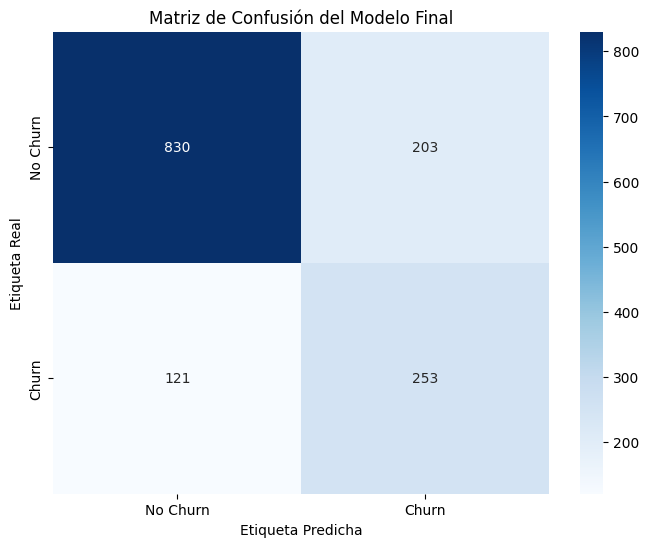

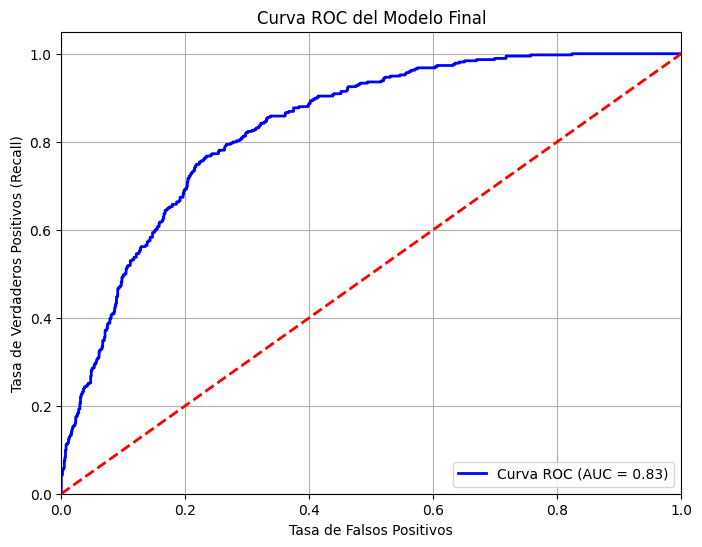


--- Top 15 Características más Importantes ---
                              feature  importance
13                    charges.monthly         504
3                              tenure         404
14                      charges.total         394
20                   contract_twoyear         123
12                   paperlessbilling         106
19                   contract_oneyear          96
15                    Cuentas_Diarias          91
21  paymentmethod_creditcardautomatic          78
6                      onlinesecurity          72
16                        gender_male          71
23          paymentmethod_mailedcheck          68
11                    streamingmovies          63
9                         techsupport          61
7                        onlinebackup          59
2                          dependents          56


/tmp/ipython-input-1425346349.py:151: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




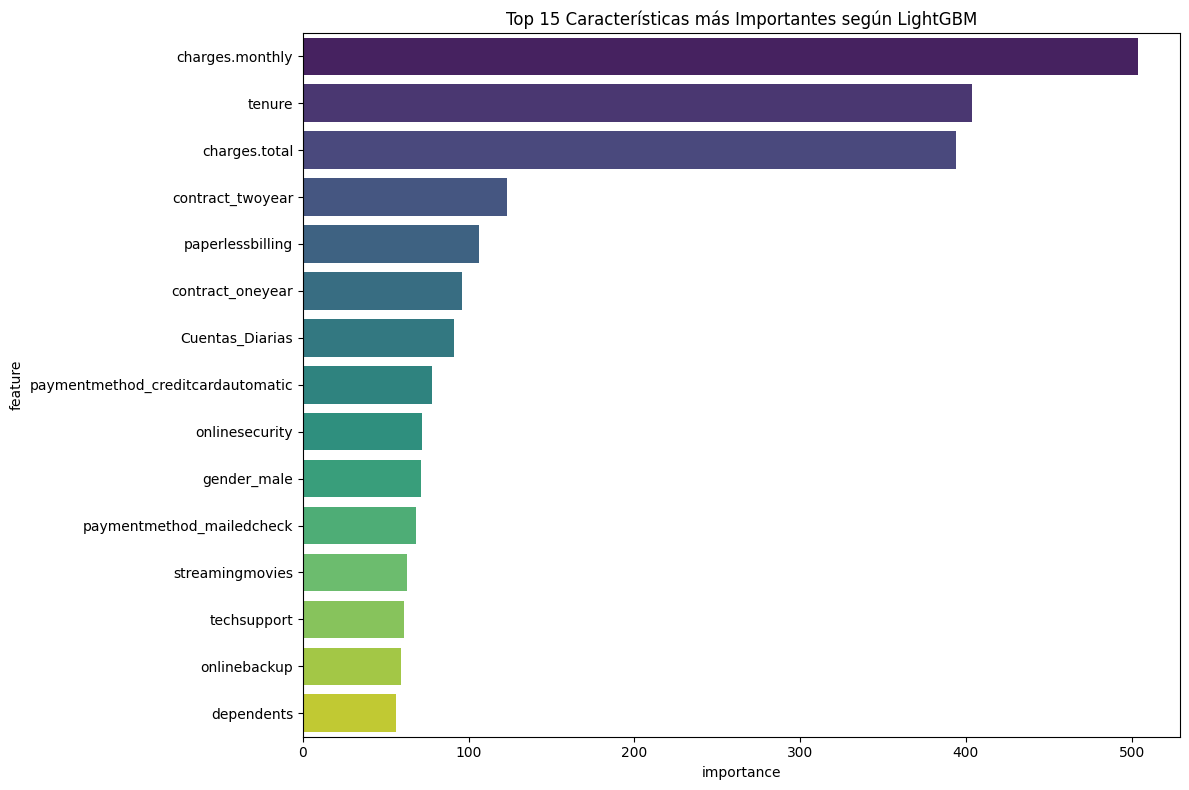

In [140]:
"""
Este script se integra con el notebook existente.
Se asume que el DataFrame 'datos_encoded' ya ha sido creado y está disponible en memoria.
El script optimiza y entrena un modelo LightGBM para la predicción de churn.
"""

# 1. Importación de Librerías Adicionales
# Algunas de estas librerías puede que ya las hayas importado, pero es una buena práctica
# asegurarse de que estén disponibles para este bloque de código.
import lightgbm as lgb
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# 2. Preparación de Datos (Usando el DataFrame existente)
# NO se carga ningún archivo CSV. Se utiliza 'datos_encoded' directamente.
print("Utilizando el DataFrame 'datos_encoded' existente para el entrenamiento del modelo.")

# Separar características (X) y variable objetivo (y)
X = datos_encoded.drop('churn', axis=1)
y = datos_encoded['churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
# Se usa stratify=y para mantener la proporción de churn en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# 3. Optimización de Hiperparámetros con Optuna y LightGBM
# Optuna es una herramienta más eficiente que GridSearchCV para encontrar buenos hiperparámetros.
# LightGBM es un modelo de gradient boosting rápido y de alto rendimiento.

def objective(trial):
    """
    Función objetivo que Optuna intentará optimizar (en este caso, maximizar el ROC AUC).
    """
    # Definir el espacio de búsqueda de hiperparámetros
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
    }

    # Crear el pipeline con SMOTE, escalador y el clasificador LightGBM
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('lgbm', lgb.LGBMClassifier(**params, random_state=42))
    ])

    # Usar validación cruzada estratificada para una evaluación robusta
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)

    return score.mean()

# Iniciar el estudio de optimización de Optuna
# Se busca maximizar la función objetivo (el ROC AUC promedio)
# n_trials se puede aumentar para una búsqueda más exhaustiva, pero 50 es un buen punto de partida.
study = optuna.create_study(direction='maximize', study_name='LGBM Churn Optimization')
study.optimize(objective, n_trials=50)

print(f"\nMejor puntuación ROC AUC en validación cruzada: {study.best_value:.4f}")
print("Mejores hiperparámetros encontrados:")
print(study.best_params)


# 4. Entrenamiento del Modelo Final con los Mejores Hiperparámetros
# Crear el pipeline final con los parámetros óptimos encontrados por Optuna
best_params = study.best_params
final_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('lgbm', lgb.LGBMClassifier(**best_params, random_state=42, objective='binary'))
])

# Entrenar el modelo final con todo el conjunto de entrenamiento
final_pipeline.fit(X_train, y_train)


# 5. Evaluación Exhaustiva del Modelo Final en el Conjunto de Prueba
print("\n--- Evaluación del Modelo Final en el Conjunto de Prueba ---")
y_pred = final_pipeline.predict(X_test)
y_pred_proba = final_pipeline.predict_proba(X_test)[:, 1]

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Puntuación ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Puntuación ROC-AUC en el conjunto de prueba: {roc_auc:.4f}")

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión del Modelo Final')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos (Recall)')
plt.title('Curva ROC del Modelo Final')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# 6. Análisis de Importancia de Características
# Extraer el modelo LightGBM del pipeline
lgbm_model = final_pipeline.named_steps['lgbm']

# Crear un DataFrame con la importancia de las características
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgbm_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n--- Top 15 Características más Importantes ---")
print(feature_importances.head(15))

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette='viridis')
plt.title('Top 15 Características más Importantes según LightGBM')
plt.tight_layout()
plt.show()

In [141]:
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper(
    [([feature], StandardScaler()) for feature in X.columns],
    df_out=True  # Devuelve un DataFrame en lugar de un array
)

final_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('mapper', mapper),
    ('lgbm', lgb.LGBMClassifier(**best_params, random_state=42))
])

# Entrenar y predecir sin warnings
final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)



In [142]:
import joblib
joblib.dump(final_pipeline, 'modelo_churn_lgbm.pkl')

['modelo_churn_lgbm.pkl']

In [143]:
resultados = pd.DataFrame({
    'churn_real': y,
    'churn_pred': y_pred_final,
    'probabilidad_churn': y_proba_final
})

In [144]:
# Predecir sobre TODOS los datos originales (X = datos_encoded.drop('churn', axis=1))
y_pred_final = final_pipeline.predict(X)  # Predicciones binarias (0 o 1)
y_proba_final = final_pipeline.predict_proba(X)[:, 1]  # Probabilidades de churn (entre 0 y 1)

In [145]:
#crear un DF con los resultados
resultados_completos = pd.DataFrame({
    'churn_real': y,  # Etiquetas reales (si las tienes)
    'churn_pred': y_pred_final,  # Predicciones del modelo
    'probabilidad_churn': y_proba_final  # Probabilidad de ser churn
})

# Opcional: Añadir las características originales para análisis detallado
resultados_completos = pd.concat([datos_encoded.drop('churn', axis=1), resultados_completos], axis=1)

# Mostrar las primeras filas
print(resultados_completos.head())

   seniorcitizen  partner  dependents  tenure  phoneservice  multiplelines  \
0              0        1           1       9             1              0   
1              0        0           0       9             1              1   
2              0        0           0       4             1              0   
3              1        1           0      13             1              0   
4              1        1           0       3             1              0   

   onlinesecurity  onlinebackup  deviceprotection  techsupport  ...  \
0               0             1                 0            1  ...   
1               0             0                 0            0  ...   
2               0             0                 1            0  ...   
3               0             1                 1            0  ...   
4               0             0                 0            1  ...   

   internetservice_fiberoptic  internetservice_no  contract_oneyear  \
0                           0    

In [146]:
# Validación adicional
# comparar las predicciones globales con las del conjunto de prueba:

print("\nDistribución de churn predicho en todos los datos:")
print(resultados_completos['churn_pred'].value_counts(normalize=True))

print("\nDistribución de churn predicho en el conjunto de prueba (para comparar):")
print(pd.Series(y_pred).value_counts(normalize=True))





Distribución de churn predicho en todos los datos:
churn_pred
0    0.68302
1    0.31698
Name: proportion, dtype: float64

Distribución de churn predicho en el conjunto de prueba (para comparar):
0    0.675906
1    0.324094
Name: proportion, dtype: float64


In [147]:
#análisis de falsos negativos/positivos

falsos_negativos = resultados_completos[(resultados_completos['churn_real'] == 1) & (resultados_completos['churn_pred'] == 0)]
print(f"Número de falsos negativos: {len(falsos_negativos)}")


Número de falsos negativos: 551


In [148]:
#Proporción Respecto al Total de Churn Real
#Calcular el porcentaje de falsos negativos sobre todos los casos positivos reales:
total_churn_real = len(resultados_completos[resultados_completos['churn_real'] == 1])
porcentaje_falsos_negativos = (len(falsos_negativos) / total_churn_real) * 100
print(f"Porcentaje de falsos negativos: {porcentaje_falsos_negativos:.2f}%")

Porcentaje de falsos negativos: 29.48%
